# <center> HW1 - Real Estate Linear Regression </center>

# Question 1: NumPy Linear Regression
In this question, students will implement the linear regression model via stochastic gradient descent (SGD) to predict the real estate cost using the provided data. Students must use only NumPy, Stat, Pandas, and Matplotlib in this question.

a) Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 75% and 25% for the training and testing datasets, respectively. Please explain the performance. Students can make visualizations if necessary.

# A. Load Data

In [82]:
import pandas as pd
import numpy as np

DF = pd.read_csv('Real_Estate.csv')
DF.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


Let's take a look at a few observations in our data, and try to understand more about how features may be related to our target. While we can enter the pre-processing and exploratory data analysis phase with assumptions on how our features of X1-X6 (wherein X5,X6 ~ location) on our target Y ~ house price per unit area, it will be best to statistically compute relations between our data, such that we can balance computational costs with model accuracy for a highly effective linear regression predictive model.

# B. Exploratory Data Analysis (EDA)
## B.1 Values
Let's understand the structure of the 'Real Estate.csv' dataset (NOTE: I renamed it to Real_Estate.csv)

In [83]:
DF.shape

(414, 8)

This output suggests that there are 414 observations provided in the dataset. Of the 414 examples, we will use 75% for training the dataset and 25% to test the validity of our model.

In [84]:
DF.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Given the types of our data, we are able to see that we have 6 features, X1-X6 which we will use to capture patterns amongst desired features (and combinations of them) which will allow us to minimize errors in our model and its predictions.

In [85]:
DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


By taking a short look at the distribution provided by the fields in our data set, we can learn more about how relations may be present and how data and its meaning is represented. For example, we can see that the average (mean) house price per unit area is 37.98 Taiwanese dollars. Also, the median house price per unit area (50% position/2nd Quarter) is 38.45 Taiwanese dollars. 

From this, we can see that mean < median (house price per unit area), but not considerably, which is a good sign. The fact they are quite close to each other assures us that we have a large, diverse enough dataset to capture relevant patterns between our features (X1-X6) and our target (Y ~ house price per unit area) in terms of preparing our data for model implementation.

Another piece of good news is that the fact that our mean < median helps us assure validity of our data this point. The provided statistical description that our data ~ house price per unit area has a <bold> slight <bold> left (negative) skew checks out well with the general capialist renters market, in which there is a higher volume of more affordable (normal and inferior [in terms of macroeconomics]) housing than there is of its more luxurious counterpart, as the capitalist system relies on exploitation of the mass of people.

In [86]:
DF.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Above, we check the missing values in the dataset. Fortunately, we don't have any observations with missing column-data. 

## B.1 Visualization

In [87]:
import matplotlib.pyplot as plt

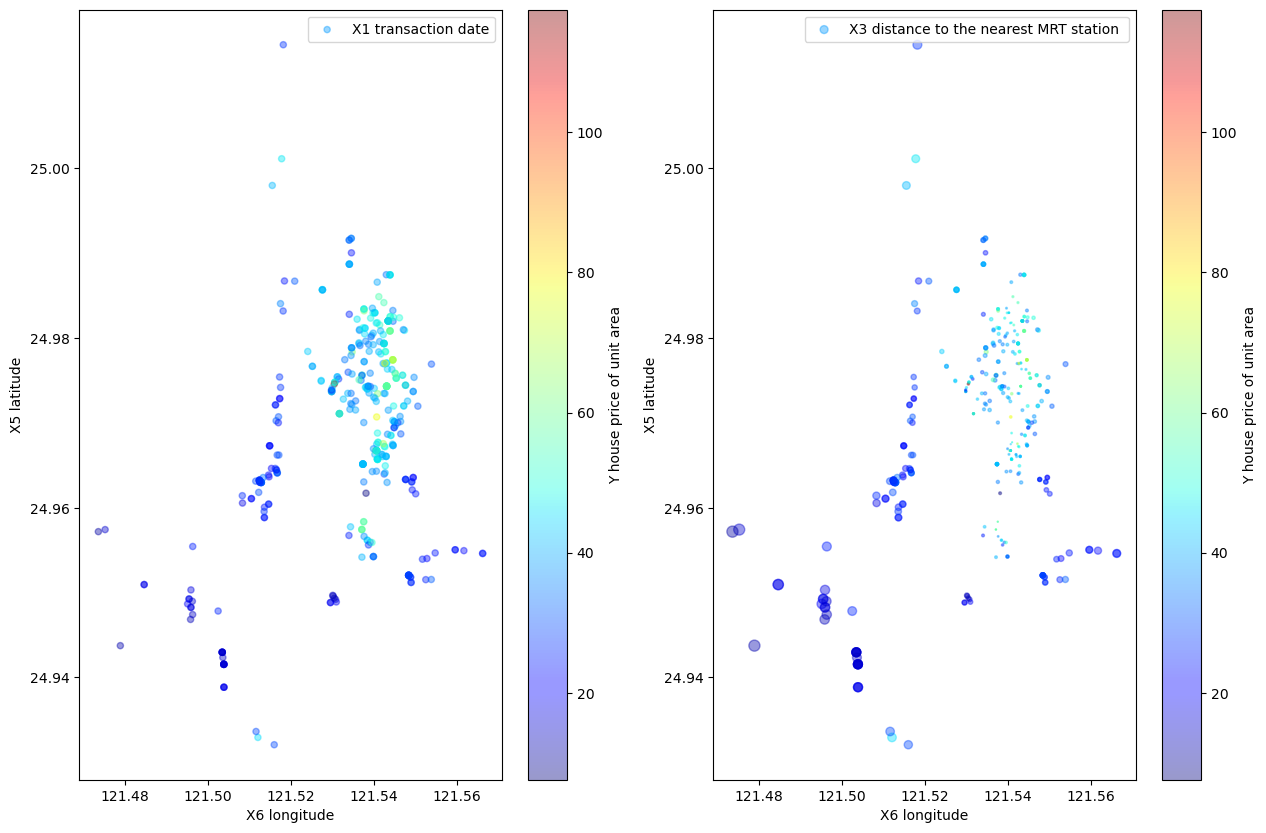

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X1 transaction date"]/100,
       label="X1 transaction date",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax1)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X3 distance to the nearest MRT station"]/100,
       label="X3 distance to the nearest MRT station ",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax2)
plt.legend()
plt.show()

Notably, we can use graphical representations to show how the housing market (house price of unit area) and the features (X1-X4) may be related. Above, we can see the graphical mappings (latitude, longitude) against two features X1 (transaction date) and X3 (distance to the nearest MRT station) have notable impact on the target Y (house price per unit area), even as we take just 1% of the value of the data. This may suggest that these attriutes are naturally and strongly correlated with the house price per unit area. 

Below, we have comparatively "amplified" the data on X2 (house age) and X4 (number of convenience stores) by different degrees of 10, in order to try to capture the bigger and better picture of the data. The fact that the maps without this amplification doesn't gain much use for us is not a problem at all actually, as there can very well still be underlying patterns and correlations that just necessitate success in the pre-processing phase, and further data training process.

Particularly, it is useful to note in the graph demonstrating the number of convenience stores (below on the right) that as we get further away from more populous zones (identifiable from densely packed, and maybe more expensive, housing units). The insight gained from this map suggests that convenience stores are less common in less populated zones, and more prevalent in highly populous areas, which makes logical sense.

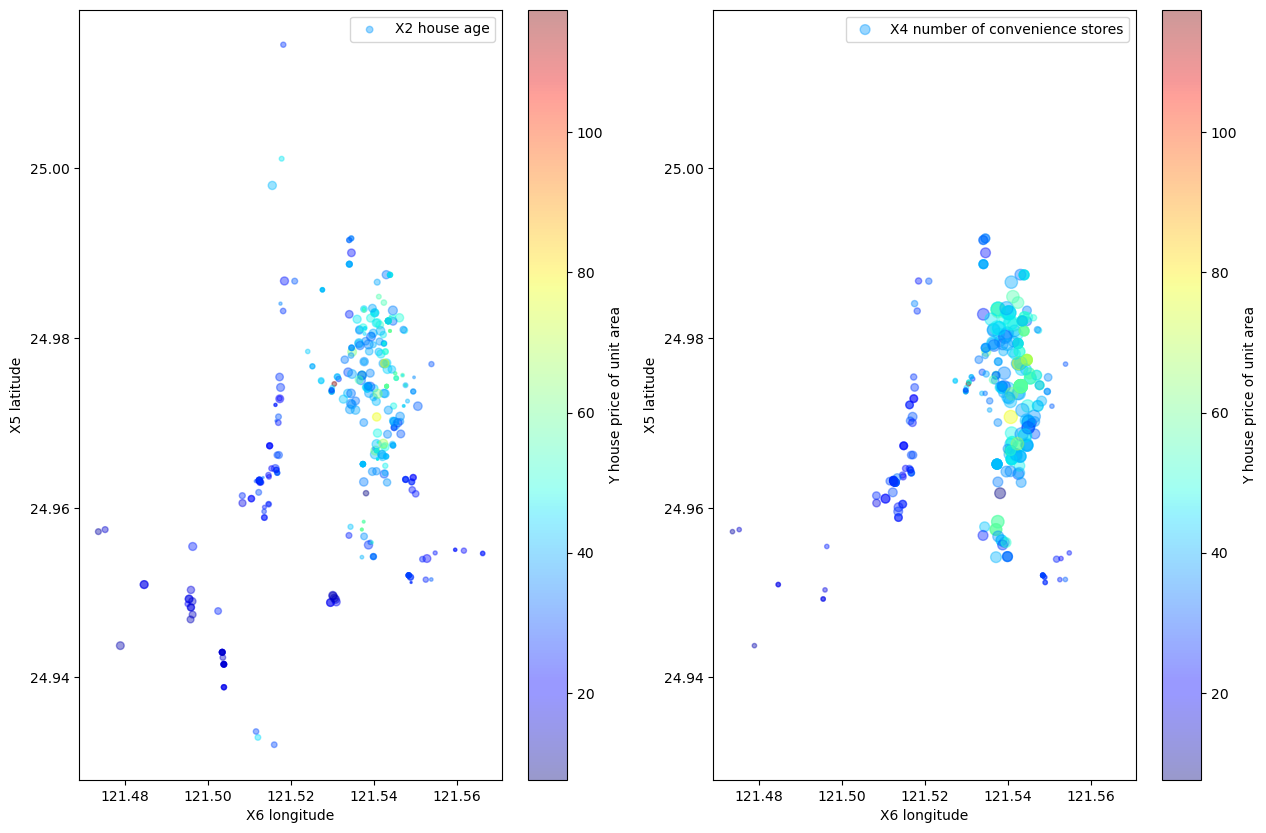

In [89]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X2 house age"],
       label="X2 house age",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax3)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X4 number of convenience stores"]*10,
       label="X4 number of convenience stores",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax4)
plt.legend()
plt.show()

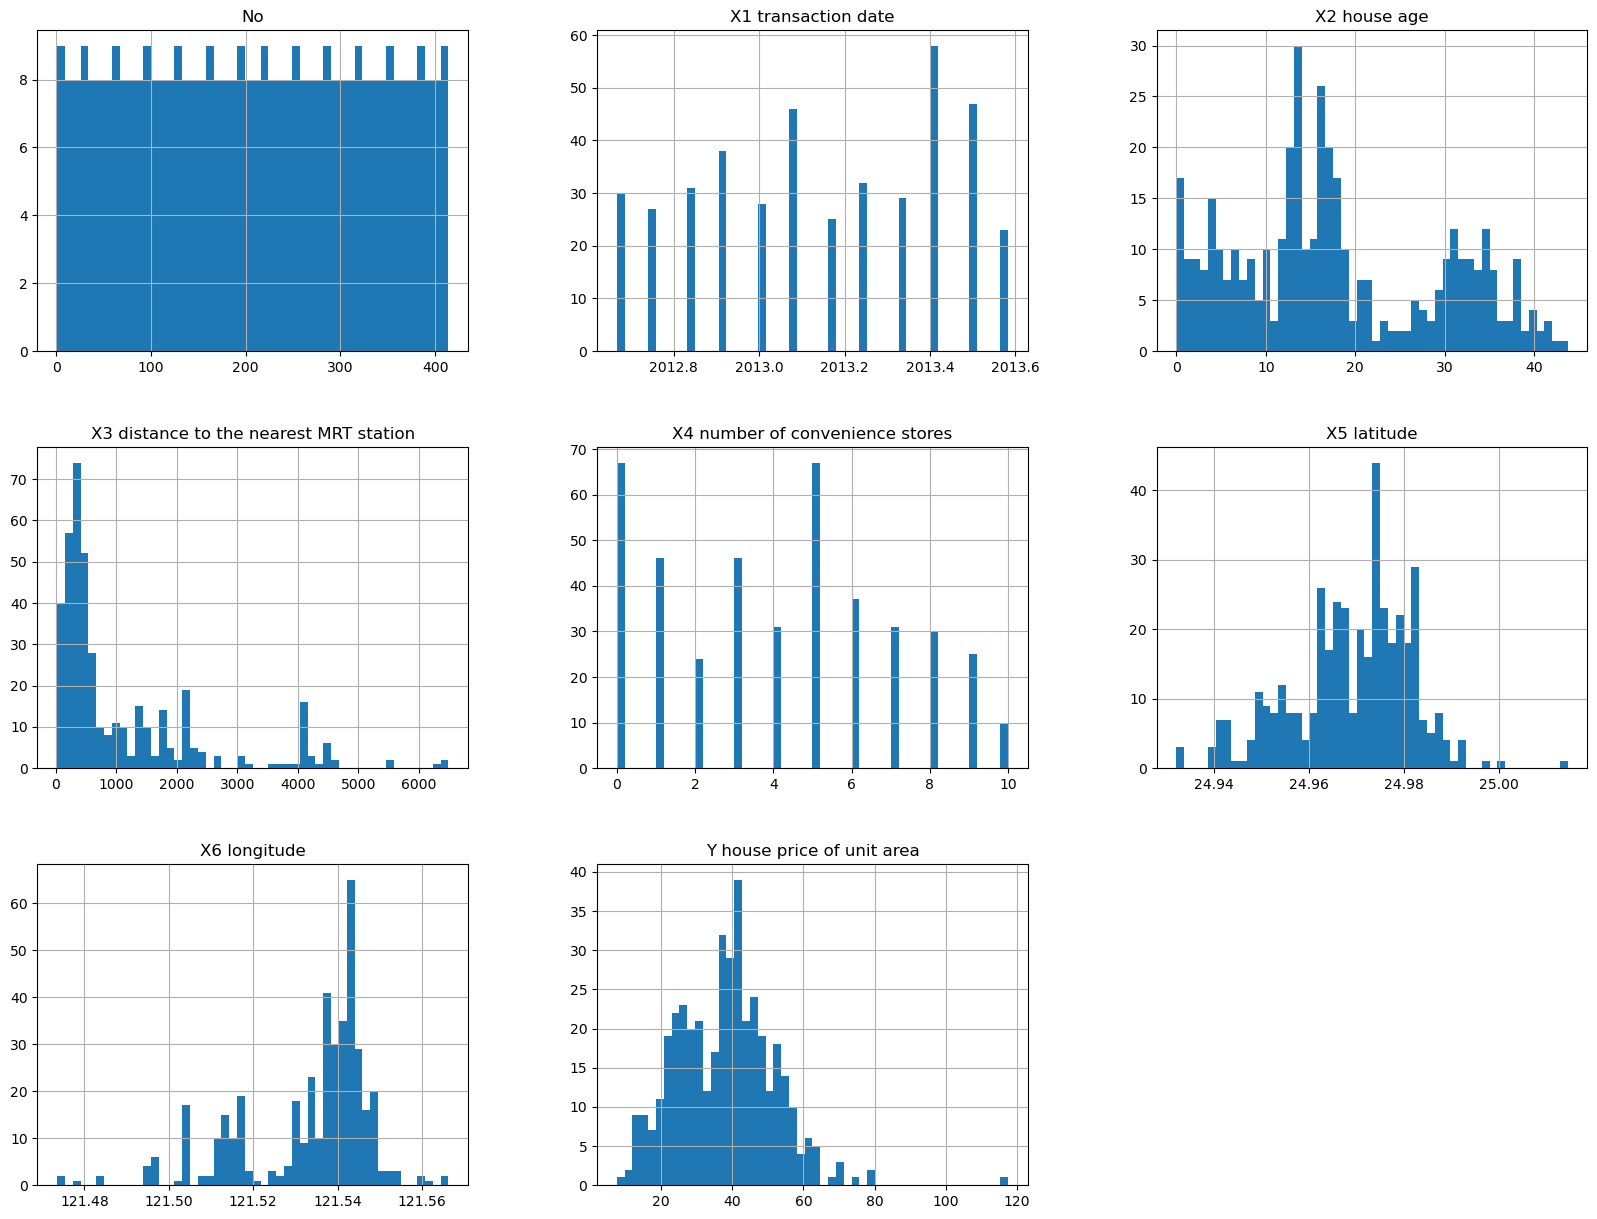

In [90]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

In this histogram, we can get a sense for each columns separate distributions. From this, we can note details such as whether each feature generally faces a upside-down U shaped distribution and skewness to the left or right to suggest data is normally distributed, as is required by the algorithm, and to keep note of which columns may contain outliers or skewness that need to be dealt with. All of these properties must be checked, such that we have a normal distribution without sensitivity-producing outliers, which we can achieve through different skewed data transformations and outlier-reimputations (without changing the model performance). 

The histogram for X1 above brings about some good news, as we look for features that may not be particularly desirable for our ML algorithm. Particularly looking at the values in this feature X1 ~ transaction date, our observations were all taken in a small timeframe, from about September 2012 to about May 2013. We can understand that in the vast majority of cases, particularly given conditions of a stable economy, prices don't change so drastically in the short-run timeframe.

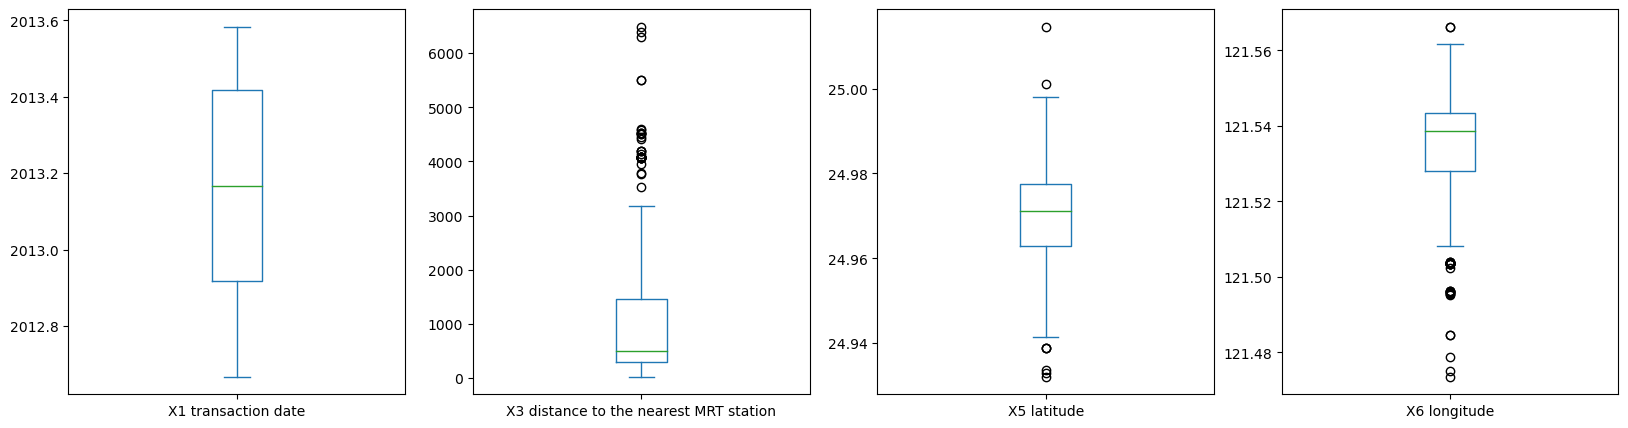

In [91]:
from scipy.stats import lognorm
import statsmodels.api as sm

fig, (ax1, ax2, ax6, ax7) = plt.subplots(1, 4,figsize=(20,5))
DF['X1 transaction date'].plot.box(ax=ax1)

# DF_ = DF[DF['median_income']<=8]
DF['X3 distance to the nearest MRT station'].plot.box(ax=ax2)

DF['X5 latitude'].plot.box(ax=ax6)

DF['X6 longitude'].plot.box(ax=ax7)
plt.show()

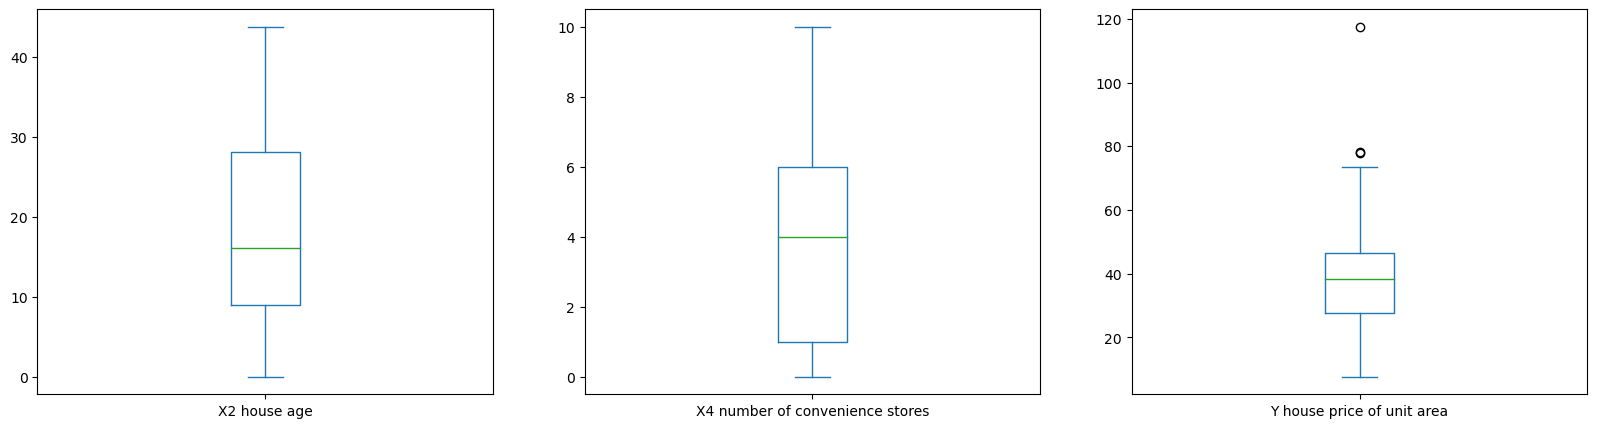

In [92]:
fig, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(20,5))
DF['X2 house age'].plot.box(ax=ax3)

# DF_ = DF[DF['median_income']<=8]
DF['X4 number of convenience stores'].plot.box(ax=ax4)


DF["Y house price of unit area"].plot.box(ax=ax5)
plt.show()

A box plot can show the data distribution and outliers in each feature with more statistical precision than the histograms, so we may choose the box plots as a final layer of protection as we decide how to handle outliers such that the model performance is optimized. 

Features X1, X2, and X4 don't contain outliers, and appear normally distributed despite having left (X2, X4) and right (X1) skew. Features X5 and X6 have outliers though these positional data columns will be dealt with using feature engineering, or another very similar method, later on. We can likely assume integrity in this precise latitude longitude data, and compose a feature out of it.

X3 has many outliers, and the volume of the outliers suggest there is maybe a good reason to keep such outliers, and instead assess later on how they may possibly end up making the model more sensitive, or whether they are actually integral to our model performance. It may be to early in the analysis phase to fully understand. Intuitively, it may be good to allow these outliers make the model more sensitive if it means it will actually make our predictions most accurate, as they are likely legitimate data points referencing a mass of people living in suburbs, or the general areas where it is common to not have convenience stores around. We will assess X3 as we go through the EDA, pre-processing phase as potential for outlier handling.

On the other hand, it is considerable that almost all places in a city such as Tei Pei would have MRT stations closeby in all of its city limits. This concept may drive further motivation to explore dropping such outliers and reimputing with its mean/median value. 

Our target (Y ~ house price of unit area) has a very minimal amount of outliers, so there is little incentive to deal with these outliers as the patterns in the data will surely still be captured. Unless a sensitivity issue comes up in the implementation process, it may be trivial to assess at the moment, but instead later on recognize that the model may be affected by outliers in our target data. It is true that we don't want our model to assume an outlier and be subject to these sensitivities, particularly in terms of predicting a final value, so it will duelly be important to note that Y has presence of at least 2 outliers.

In [108]:
corr_matrix = DF[['X1 transaction date',
                  'X2 house age',
                  'X3 distance to the nearest MRT station',
                  'X4 number of convenience stores',
                  'X5 latitude',
                  'X6 longitude', 
                  'Y house price of unit area']].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.058314,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,-0.058413,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.058314,-0.058413,1.000000,-0.554107,-0.322170,-0.468564,-0.610634
X4 number of convenience stores,0.009635,0.049593,-0.554107,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.322170,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.468564,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.610634,0.571005,0.546307,0.523287,1.000000


A correlation matrix may be able to identify the potential for feature engineering, notably between (groups of) features which have high correlation coefficients. In this case, it is particularly suggestable that feature engineering can be done between shared groups of features that have notably high (positive or negative) relations, particularly as it depends on hitting higher correlations onto the target. I believe it may be good to use feature engineering in combination with all location-based data. The data here suggests that population-based features compose actually the biggest weight (correlation) on Y ~ the house price per unit area. 

In addition, if we look at the correlation matrix below, we will only note a slight 0.0875 correlation to our target for X1 (transaction date), and the scatter matrix only shows a slight 'inflation' (of 0.0875), which may end up just producing further computational tax, and potential for noise and computational and (my) cognitive error -- let's make ourl lives simple and deduce for now that transaction date will not produce much efficacy in our implementation, and will result in (arguably, for my case) negligible additive performace when deducing the resources we want to use. Professional researchers in the domain may be more influenced by this data, but for our cases it may not be so important (unless further research area for it is realized by motives of precise weighting techniques and issues arise). However, given the fact that the feature never correlates above 8.75% to any other column, we may not get much impact from adding this column. The question to keep or drop X1 will certainly come up later. We may be able to track housing inflation rates for this 9 month period, but I don't think this will add much performace to our model.

X2 ~ house age begs a similar question. The feature correlation coeffient hits its highest amongst the features in the matrix at the target Y ~ house price per unit area at only -21% correlated. None of the "between" feature correlation nor the target correlations for X2 are very desirable. Notably, the scatter matrix between X2 ~ house age and Y ~ house price per unit area suggests the complication our model may face by including X2. There seems to be a sort of economic recession or other similar reason for much less, and clearly cheaper housing was being built (and sold/priced) from about 20 to 30 years ago. The data therefore does not provide much correlation with the target nor any other feature. There may be little incentive to add X1 or X2 due to compliations they could produce for the model, for the little added performance.

I may not understand the complete picture of the tradeoff between the extra computational tax and the added model performace, but for an area I have not previosuly studied and based on statistical understandings of statistical tradeoffs in machine learning with algorithmic and computational cost, it seems fair to say that a absolute value of less than 0.25 may not be efficable for inclusion into the model. 

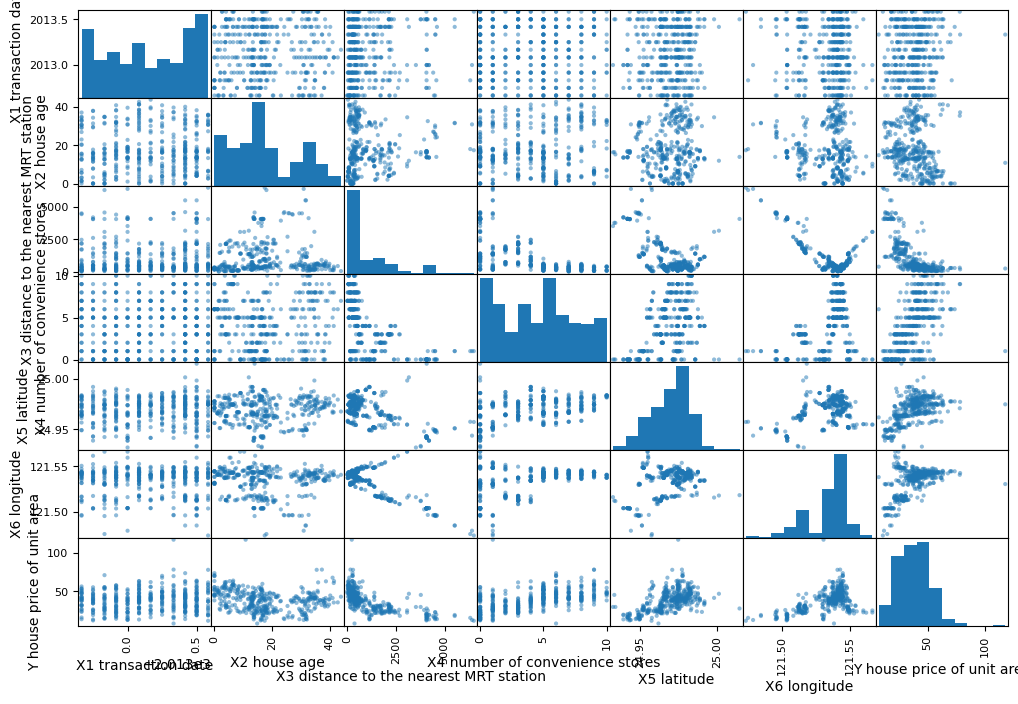

In [94]:
from pandas.plotting import scatter_matrix

features = ['X1 transaction date',
                  'X2 house age',
                  'X3 distance to the nearest MRT station',
                  'X4 number of convenience stores',
                  'X5 latitude',
                  'X6 longitude', 
                  'Y house price of unit area']
scatter_matrix(DF[features], figsize=(12,8))
plt.show()

We can derive some interesting conclusions as to how we want to approach our next steps from the above correlation matrix. Notably, we can note that the features involving positional data may be benefitted from feature engineering. Particularly from the correlation matrix, we can see that X4 ~ number of convenience stores, X5 ~ latitude, and X6 ~ longitude are the most highly correlated with the house price per unit area.

# C. Pre-processing

## C.1 Missing value imputation

It's possible that we may want to assess outliers, as we can remember we are fortunate to have filled in values for the entirety of the dataset. Let's see if there is motive to remove outliers for X3 ~ distance to the nearest MRT, to settle our debate of whether the "sub-urban" outliers are helpful or harmful to performace. We should trust statistical understanding that the model may perform better (less sensitively) without outliers. A good choice, if changing these values is necessary, is changing them to either the mean or median value (choosing whichever is higher could help compensate for the loss of outliers). 

In [95]:
X3_2 = DF['X3 distance to the nearest MRT station'].apply(lambda d: DF['X3 distance to the nearest MRT station'].mean() if d > 3200 else d)


Since we have a small number of outliers, at under 10%, I decided to impute the mean value of X3, as it was higher than the median. I will use this fixed up data for X3, with reduced outliers, as my dataset in pandas.

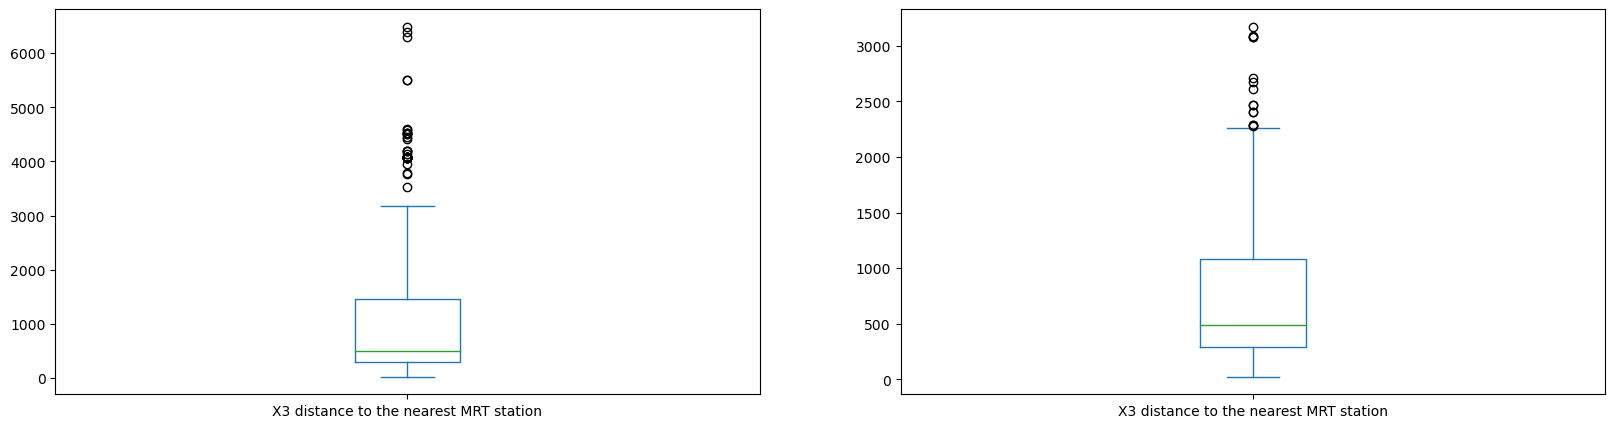

In [96]:
fig, (ax9, ax10) = plt.subplots(1, 2, figsize=(20,5))
DF['X3 distance to the nearest MRT station'].plot.box(ax=ax9)

# DF_ = DF[DF['median_income']<=8]
X3_2.plot.box(ax=ax10)
plt.show()

In [97]:
DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [98]:
DF_ = DF
DF_["X3 distance to the nearest MRT station"] = X3_2
DF_.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,785.271671,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,677.920160,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1083.885689,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,3171.329000,10.000000,25.014590,121.566270,117.500000


As we can see above, we have successfully reduced the outliers and imputed with the mean. In addition, the mean has been effectively reduced (from 1083.89 to 785.27) to a value much closer to the median (492.23), as we try to make our data fit a normal distribution. This is good to do, particularly before we begin scaling our data. Let's fill this new data for X3 in our data frame.

In [117]:
DF['X3 distance to the nearest MRT station'] = X3_2
# DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,785.271671,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,677.920160,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1083.885689,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,3171.329000,10.000000,25.014590,121.566270,117.500000


## C.2 Scaling

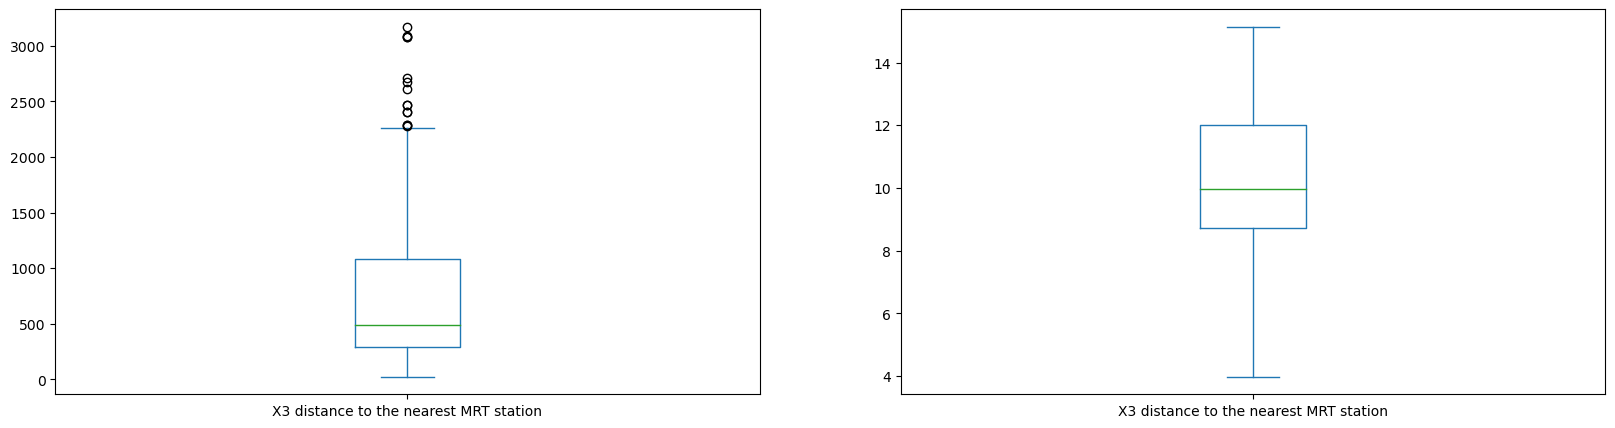

In [119]:
from scipy import stats

X_B = stats.boxcox(DF["X3 distance to the nearest MRT station"])[0]

fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,5))
DF['X3 distance to the nearest MRT station'].plot.box(ax=ax11)

# DF_ = DF

DF_['X3 distance to the nearest MRT station']=pd.Series(X_B)
DF_['X3 distance to the nearest MRT station'].plot.box(ax=ax12)
plt.show()
